# Filtros espaciales
OpenCV dispone de un conjunto de filtros espaciales ya implementados.
Además, dispone de la función genérica `filter2D` que permite aplicar cualquier filtro espacial a una imagen.

## Media

El filtro de medias se puede aplicar con la función `blur`. Esta función recibe como parámetros la imagen de entrada y el tamaño de filtro a aplicar (positivo e impar).



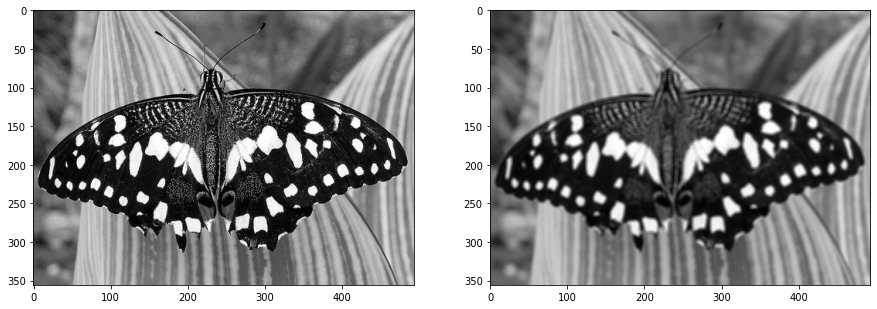

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [15,10]


im = cv2.imread('res/butterfly.jpg', cv2.IMREAD_GRAYSCALE)
blur = cv2.blur(im,(5,5)) # Filtro de medias de tamaño 5x5

f, ax = plt.subplots(1,2)
ax[0].imshow(im, cmap='gray')
ax[1].imshow(blur, cmap='gray')
plt.show()

### Ejercicio
Aplica a la imagen `butterfly.jpg` filtros de medias de tamaño 3x3 y 9x9. Qué diferencias se aprecian?

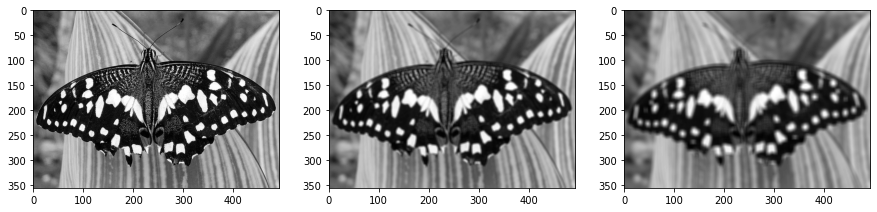

In [2]:
#Al aplicar un kernel de mayores dimensiones, el efecto del desenfoque es mayor
blur33 = cv2.blur(im,(5,5)) # Filtro de medias de tamaño 3x3
blur99 = cv2.blur(im,(9,9)) # Filtro de medias de tamaño 9x9

f, ax = plt.subplots(1,3)
ax[0].imshow(im, cmap='gray')
ax[1].imshow(blur33, cmap='gray')
ax[2].imshow(blur99, cmap='gray')

plt.show()

## Gaussiana
La función `GaussianBlur` aplica un suavizado gaussiano a la imagen. Esta función recibe tres o cuatro parámetros: 
- La imagen de entrada.
- El tamaño del filtro (positivo e impar)
- Desviación típica en la dirección X
- Desviación típica en la dirección Y. 

Si sólo se indica un valor de desviación típica, este valor se aplica tanto a X como a Y. Si, además, este valor es 0, la desviación típica se calculará automáticamente a partir del tamaño del kernel.

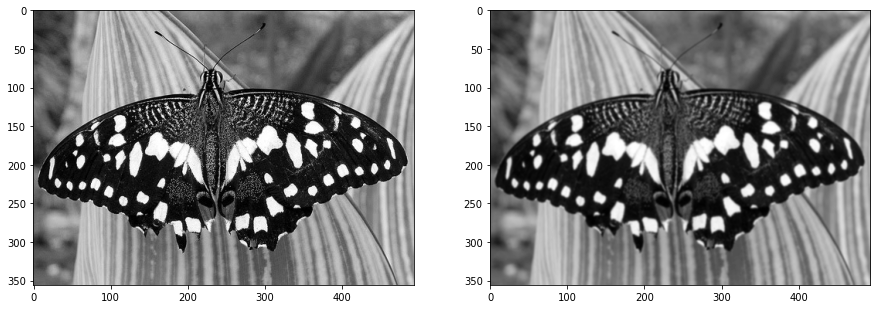

In [3]:
gaus = cv2.GaussianBlur(im, (5,5), 0)
f, ax = plt.subplots(1,2)
ax[0].imshow(im, cmap='gray')
ax[1].imshow(gaus, cmap='gray')
plt.show()

### Ejercicio
Compara la salida de aplicar a la imagen `butterfly.jpg`un filtro de medias de 11x11 y un filtro gaussiando del mismo tamaño (usar 0 como parámetro de desviación típica). Cuál de los dos filtros ofrece un mejor resultado?

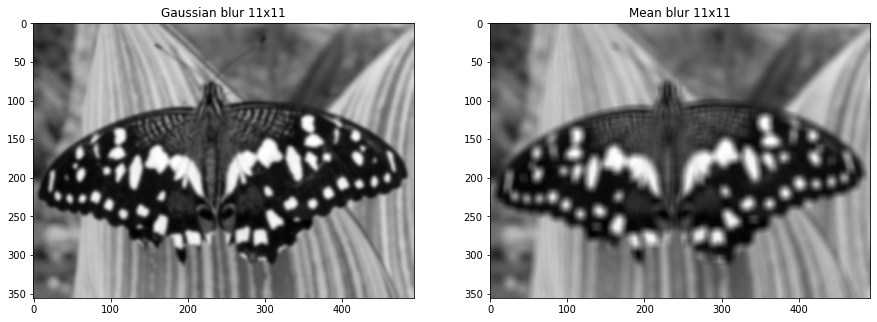

In [4]:
gauss = cv2.GaussianBlur(im, (11,11), 0)
blur = cv2.blur(im,(11,11))

fig,ax = plt.subplots(1,2)
ax[0].set_title("Gaussian blur 11x11")
ax[0].imshow(gauss, cmap='gray')
ax[1].set_title("Mean blur 11x11")
ax[1].imshow(blur, cmap='gray')
#El filtro de desenfoque gaussiano mantiene mejor los detalles en los bordes, mientras que el filtro de media puede
#crear dobles bordes, y el desenfoque es de menor calidad

## Mediana

La función `medianBlur` permite aplicar el filtro de mediana a una imagen. Toma dos parámetros, la imagen de entrada y el tamaño del filtro.

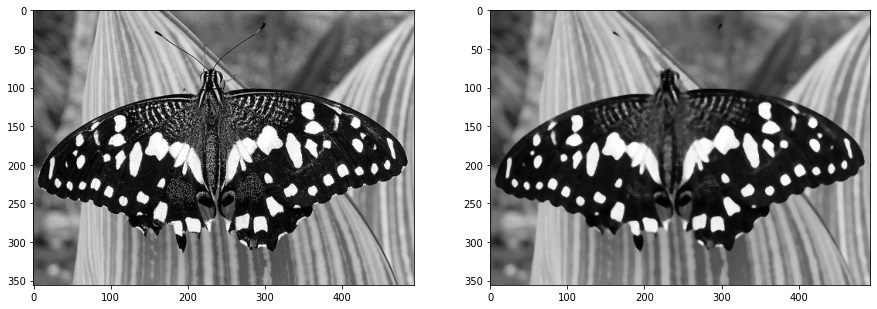

In [5]:
median = cv2.medianBlur(im, 5)
f, ax = plt.subplots(1,2)
ax[0].imshow(im, cmap='gray')
ax[1].imshow(median, cmap='gray')
plt.show()

# Realce

OpenCV no incluye ningún algoritmo de realce. Estes algoritmos consisten en una secuencia de pasos sencillos facilmente implementable con operaciones de las librerías numpy y OpenCV.

## Unsharp masking
Una de las versiones de este algoritmo consiste en los siguientes pasos:

1. Aplicar un filtro paso bajo a la imagen original, por ejemplo, un filtro de medias 3x3
2. Aplicar una compresión de histograma a la imagen suavizada.
3. Sustraer la imagen comprimida a la imagen original
4. Aplicar un estiramiento de histograma a la imagen resultante.


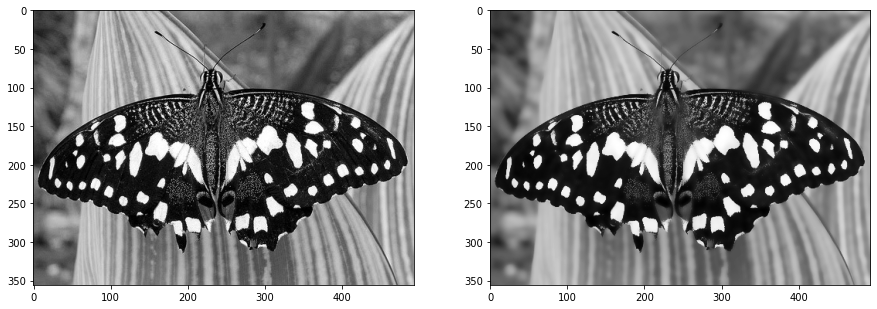

In [6]:
bil = cv2.bilateralFilter(im, 9, 50, 50)
f, ax = plt.subplots(1,2)

ax[0].imshow(im, cmap='gray')
ax[1].imshow(bil, cmap='gray')
plt.show()

0.2 0.4
-0.07619164820740018 0.4268520797440315


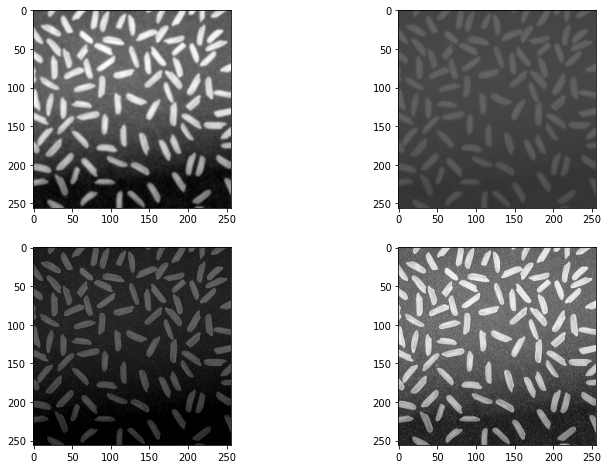

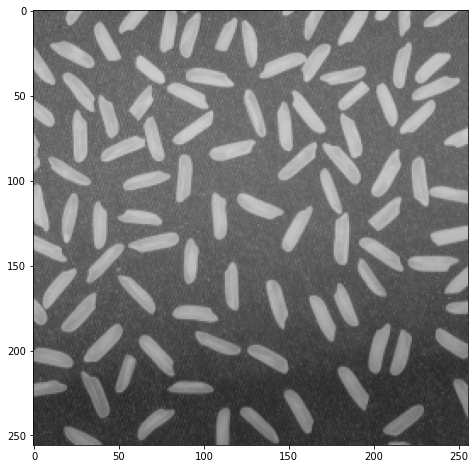

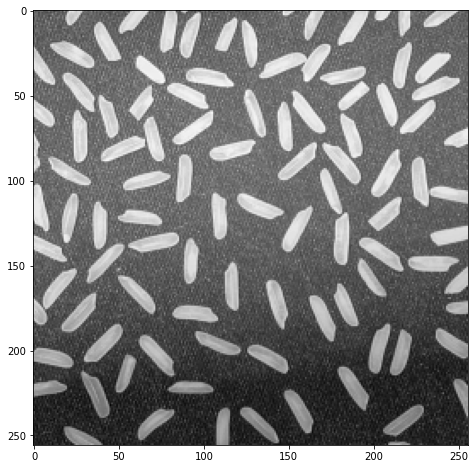

In [7]:
from skimage.exposure import rescale_intensity
plt.rcParams["figure.figsize"] = [12,8]

im = cv2.imread("res/rice.png",cv2.IMREAD_GRAYSCALE)
im = im.astype(float) / 255.0
# Paso 1
blur = cv2.blur(im, (3,3))

# Paso 2
compress = rescale_intensity(blur, in_range='image', out_range=(0.2, 0.4))
print (np.min(compress), np.max(compress))

# Paso 3
diff = im - compress
print (np.min(diff), np.max(diff))

# Paso 4
out = rescale_intensity(diff, in_range='image', out_range=(0.0, 1.0))

f, ax = plt.subplots(2,2)
ax[0,0].imshow(blur,cmap='gray')
ax[0,1].imshow(compress,cmap='gray',vmin=0, vmax=1)
ax[1,0].imshow(diff, cmap='gray',vmin=0, vmax=1)
ax[1,1].imshow(out, cmap='gray',vmin=0, vmax=1)
plt.show()

plt.imshow(im, cmap='gray',vmin=0, vmax=1)
plt.show()
plt.imshow(out, cmap='gray',vmin=0, vmax=1)
plt.show()

### Ejercicio
Implementar el algoritmo rank-based sharpening utilizando como base el código del algoritmo unsharp masking y cambiando el filtro de medias por un filtro de orden como, por ejemplo, un filtro de medianas. Visualiza las imágenes resultantes de cada paso y compara los resultados finales de ambos algoritmos.

In [ ]:
# Escribe aquí tu código

# Operadores morfológicos

Los operadores morfológicos operan en la forma de la imagen. Normalmente se aplican sobre imágenes binarias (blanco/negro) y necesitan dos entradas, la imagen original y lo que se denomina elemento estructurante. Dicho elemento estructurante es un kernel que determina la naturaleza de la operación a realizar. 


In [ ]:
im = cv2.imread('res/morph1.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(im,cmap='gray')
plt.show()

## Elemento estructurante
Un elemento estructurante es un kernel formado por 1 y 0 que determina la forma con la que se aplicará el operador morfológico. Podemos crear los elementos estructurantes a través de matrices numpy o bien utilizar una función propia de OpenCV

In [ ]:
kernel = np.ones((5,5), np.uint8)
print(kernel)

# Circular
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
print (kernel)

# Cruz
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
print (kernel)

## Erosión y dilatación
La erosión es una de las operaciones morfológicas básicas. Como su propio nombre indica, su efecto es "erosionar" las paredes de los objetos de primer plano (blanco). En la imagen resultado un pixel tomará valor 1 sólo si todos los píxeles bajo el elemento estructurante tienen también valor 1.

La dilatación es el proceso inverso a la erosión. Si al menos un pixel de la imagen original tiene valor 1 bajo el elemento estructurante, el pixel tomará valor 1 en la imagen resultante. Por tanto, esta operación sirve para rellenar huecos en el objeto de primer plano (blanco).

Las funciones `erode` y `dilate` toman tres parámetros:
- La imagen original binaria
- El elemento estructurante
- En número de iteraciones que se aplicará la operación

In [ ]:
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(im, kernel, iterations=1)
plt.imshow(erosion,cmap='gray')
plt.show()

kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(im, kernel, iterations=1)
plt.imshow(dilation,cmap='gray')
plt.show()

### Ejercicios

1) Erosiona la imagen `res/morph1.png` durante 10 iteraciones. Qué ocurre?

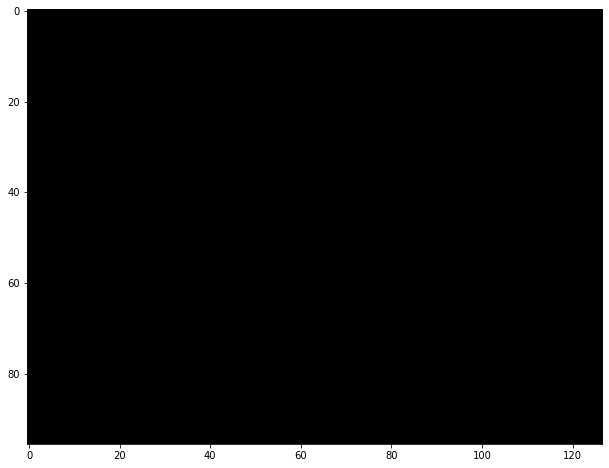

In [9]:
kernel = np.ones((5,5),np.uint8)
im = cv2.imread('res/morph1.png', cv2.IMREAD_GRAYSCALE)
eroded = cv2.erode(im,kernel,iterations = 10)
plt.imshow(eroded,cmap='gray')
plt.show()
#La imagen se erosiona más en cada iteración, lo que acaba creando una imagen completamente erosionada
#es decir, con valores 0 en todos los píxeles

2) Rellena el hueco circular la imagen `res/morph1.png` utilizando dilataciones. Qué ocurre con los bordes externos del cuadrado?


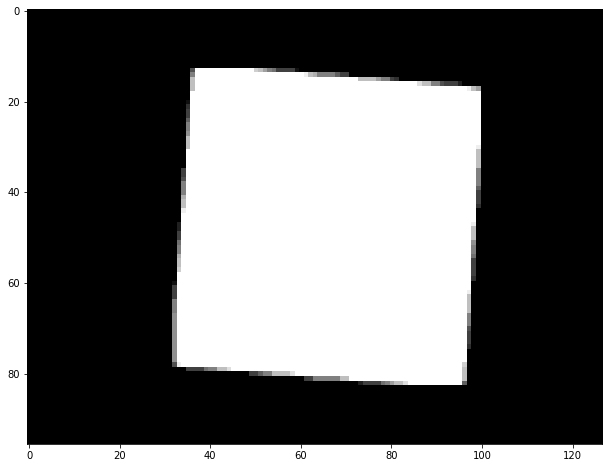

In [15]:
kernel = np.ones((11,11),np.uint8)
im = cv2.imread('res/morph1.png', cv2.IMREAD_GRAYSCALE)
dilated = cv2.dilate(im,kernel)
plt.imshow(dilated,cmap='gray')
plt.show()

## Otros operadores

La función `morphologyEx` se utiliza para aplicar otros operadores morfológicos derivados de erosiones y dilataciones. Esta función toma los siguientes parámetros:

- Imagen original binaria
- El tipo de operación a realizar (`cv2.MORPH_OPEN`, `cv2.MORPH_CLOSE`, `cv2.MORPH_TOPHAT`, `cv2.MORPH_BLACKHAT`, `cv2.MORPH_GRADIENT`)
- El elemento estructurante

In [ ]:
im2 = im * 1
im2[10:15, 10:15] = 255 # Creamos un cuadrado en la imagen

kernel = np.ones((7,7), np.uint8)
opening = cv2.morphologyEx(im2, cv2.MORPH_OPEN, kernel)
fig, ax = plt.subplots(1,2)
ax[0].imshow(im2,cmap='gray')
ax[1].imshow(opening,cmap='gray')
plt.show()

### Ejercicio

Rellena el hueco de la imagen `res/morph1.png` sin alterar el tamaño del objeto.

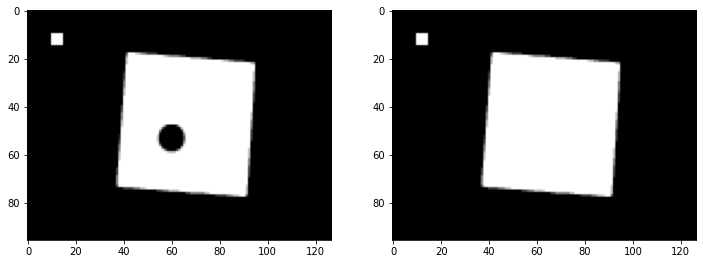

In [18]:
im2 = im * 1
im2[10:15, 10:15] = 255 # Creamos un cuadrado en la imagen

kernel = np.ones((11,11), np.uint8)
opening = cv2.morphologyEx(im2, cv2.MORPH_CLOSE, kernel)
fig, ax = plt.subplots(1,2)
ax[0].imshow(im2,cmap='gray')
ax[1].imshow(opening,cmap='gray')
plt.show()